# Determining Who is the Best Defender in College Basketball

### By: Aaron Dzaboff

## Prerequisite Packages

In [1]:
# ! pip install -U scikit-learn
# ! pip install pandas
# ! python -m pip install -U matplotlib

## Importing Modules

In [2]:
#Importing necessary packages
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.ensemble import ExtraTreesClassifier

## Creating a Pandas Dataframe

In [3]:
df = pd.read_excel(r"C:\Users\aaron\OneDrive\Documents\Indiana Pacers Project\Defensive Dataset.xlsx")
df.head()

,Name,College,Position,Defensive_Rating,Height,Weight,MPG,DRB_perc,STL_perc,BLK_perc,DWS,DBPM,Unnamed: 12
0,Ayo Dosunmu,Illinois,Guard,102.2,77.165354,182.98346,32.3,12.9,2.3,0.9,1.0,1.1,NaN
1,Andres Feliz,Illinois,Guard,101.2,74.015748,182.98346,25.1,12.5,2.5,0.2,0.7,1.2,NaN
2,Trent Frazier,Illinois,Guard,97.5,72.834646,169.75574,29.2,6.8,1.6,0.0,1.0,1.8,NaN
3,Giorgi Bezhanishvili,Illinois,Forward,103.1,81.102362,233.68972,25.3,13.8,1.4,3.4,0.8,1.3,NaN
4,Alan Griffin,Illinois,Guard,99.2,77.165354,178.57422,11.0,16.1,1.2,1.7,0.6,0.9,NaN


In [4]:
#Dropping the unnamed 12 columns
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              958 non-null    object 
 1   College           958 non-null    object 
 2   Position          958 non-null    object 
 3   Defensive_Rating  958 non-null    float64
 4   Height            958 non-null    float64
 5   Weight            958 non-null    float64
 6   MPG               958 non-null    float64
 7   DRB_perc          958 non-null    float64
 8   STL_perc          958 non-null    float64
 9   BLK_perc          958 non-null    float64
 10  DWS               958 non-null    float64
 11  DBPM              958 non-null    float64
dtypes: float64(9), object(3)
memory usage: 89.9+ KB


## Explanation of the Variables and Dataset

The dataset consists of college basketball players in the Big Ten, Big 12, ACC, SEC, Pac 12, and Big East conferences for the 2019-2020 season. 

Source: https://www.sports-reference.com/cbb/

- Defensive Rating - shows how many points a player allows per 100 possessions
    - Defensive Rating is different from the plus/minus measurements. The plus/minus stat accounts for all points scored against the team while a specific player is on the court. Whereas the Defensive Rating stat accounts for only the points/buckets that were scored as a result of a specific player’s defensive lapse.

- Height - a player's height measured in inches

- Weight - a player's weight measured in pounds

- MPG - a player's minutes per game

- DRB_perc - the percentage of available defensive rebounds that a player collects while he's on the court

- STL_perc - the percentage of an opponent's possessions that end up with the player in question stealing the ball away and starting the ensuing offensive possession, provided that he's on the court for the possession

- BLK_perc - the percentage of an opponent's two-point attempts that end up with the player in question blocking a shot

- DWS - Defensive Win Shares; an estimate of the number of wins contributed by a player due to his defense

- DBPM - Box Plus/Minus; A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team

Source: https://bleacherreport.com/articles/1040309-understanding-the-nba-explaining-advanced-defensive-stats-and-metrics#slide5

## Modeling with K Means Clustering

In [5]:
df_sub = df[["Defensive_Rating","MPG","DRB_perc","STL_perc","BLK_perc","DWS","DBPM"]]

### Determining the optimal number of clusters using the Elbow Method

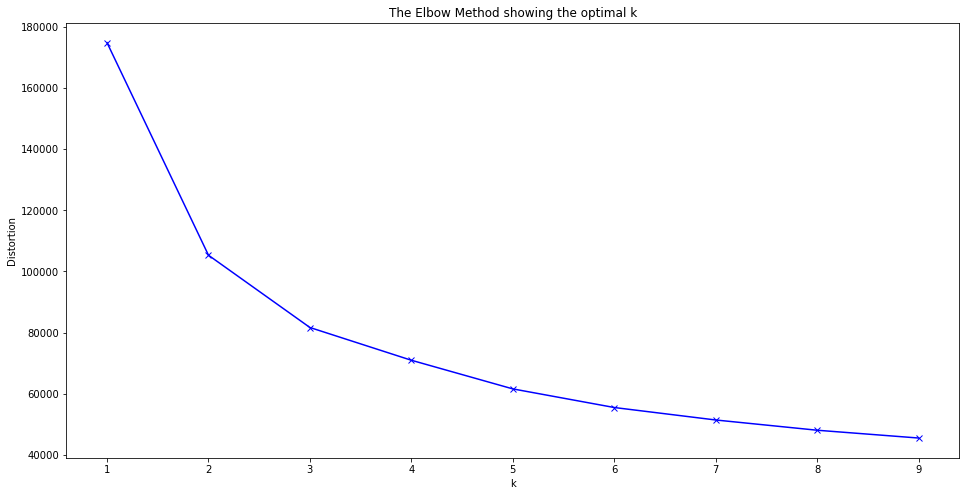

In [6]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_sub)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow method calculates the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

In this case the optimal value of clusters is 3.

(From: https://predictivehacks.com/k-means-elbow-method-code-for-python/)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=1)

In [8]:
#Fitting the  model
kmeans.fit(df_sub)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [9]:
centroids = kmeans.cluster_centers_  #store the values of centroids

In [10]:
labels = kmeans.labels_     #store the value of the labels

In [11]:
#Add a new column label with the clustering labels 
df["label"] = kmeans.labels_
df.sample(n=10, replace=False, random_state=0)  #sample of the data with the new label column

,Name,College,Position,Defensive_Rating,Height,Weight,MPG,DRB_perc,STL_perc,BLK_perc,DWS,DBPM,label
879,Yves Pons,Tennessee,Guard,97.4,77.952756,207.23428,15.3,11.4,0.9,6.4,2.1,4.7,2
496,Jordan Brown,Arizona,Forward,92.8,83.070866,209.43890,10.1,17.5,1.7,5.5,0.8,5.0,2
14,Xavier Tillman,Michigan State,Forward,87.2,79.921260,244.71282,31.3,21.1,2.1,7.3,5.2,8.6,1
546,Juhwan Harris-Dyson,Cal,Guard,109.4,77.165354,202.82504,17.1,11.3,3.1,1.7,0.9,1.3,1
55,Joshua Tomaic,Maryland,Forward,102.9,81.102362,233.68972,6.2,13.7,0.0,3.1,0.5,1.5,0
785,Marlon Taylor,LSU,Guard,104.7,77.165354,209.43890,22.8,11.6,1.7,1.2,1.2,1.4,1
202,Obim Okeke,Baylor,Guard,97.2,72.834646,224.87124,3.4,12.8,3.4,0.0,0.1,0.5,0
566,Alfred Hollins,Oregon State,Forward,104.0,77.952756,194.00656,18.2,15.0,1.8,1.4,1.8,0.1,1
940,Franco Miller Jr,Ole Miss,Guard,104.2,74.015748,200.62042,9.1,13.1,0.5,0.0,0.1,0.5,0
299,Pierson McAtee,Kansas State,Forward,95.2,77.952756,198.41580,2.2,22.7,1.5,2.2,0.2,0.6,2


In [12]:
#Show how many people are in each cluster
df.label.value_counts()

1    442
2    272
0    244
Name: label, dtype: int64

In [13]:
#Grouping the dataset by the labels and showing mean to determine which cluster has the best attributes
df.groupby("label").mean()

,Defensive_Rating,Height,Weight,MPG,DRB_perc,STL_perc,BLK_perc,DWS,DBPM
label,,,,,,,,,
0,104.320082,76.268233,195.262471,6.735246,8.007377,1.296721,0.970492,0.268443,-0.721721
1,100.483032,76.842912,201.203996,25.307919,12.506109,1.915158,1.680543,1.915385,1.897059
2,94.856985,79.091883,212.486463,10.600735,17.190809,1.883088,3.569485,0.875368,3.048529


In [14]:
#Chose cluster 1 based on their defensive rating and minutes per game
Best_defenders = df[df.label == 1].sort_values("Defensive_Rating")
Best_defenders.head(10)

,Name,College,Position,Defensive_Rating,Height,Weight,MPG,DRB_perc,STL_perc,BLK_perc,DWS,DBPM,label
474,Tyrell Terry,Stanford,Guard,85.2,72.834646,158.73264,31.9,16.3,2.9,0.0,1.7,3.3,1
448,Onyeka Okongwu,USC,Forward,86.5,81.102362,244.71282,29.8,20.1,2.0,11.2,1.6,8.2,1
627,Thomas Woldetensae,Virgina,Guard,87.2,77.165354,194.00656,24.7,10.1,1.8,1.5,1.2,4.0,1
14,Xavier Tillman,Michigan State,Forward,87.2,79.921260,244.71282,31.3,21.1,2.1,7.3,5.2,8.6,1
628,Casey Morsell,Virgina,Guard,88.8,74.803150,194.00656,24.7,7.7,1.7,0.9,1.2,3.2,1
244,T.J. Holyfield,Texas Tech,Forward,89.2,79.921260,224.87124,23.3,14.6,1.8,5.6,1.1,6.2,1
475,Spencer Jones,Stanford,Forward,89.3,79.133858,194.00656,29.2,11.2,1.2,3.9,1.4,3.4,1
219,Miles McBride,West Virgina,Guard,89.3,74.015748,194.00656,21.9,9.1,2.7,2.7,1.1,4.8,1
32,Akwasi Yeboah,Rutgers,Guard,89.7,77.952756,233.68972,22.6,15.5,1.7,1.9,1.1,2.8,1
241,Jahmi'us Ramsey,Texas Tech,Guard,89.7,75.984252,194.00656,30.7,13.1,2.7,2.6,1.2,3.7,1


According to my model and logic, the players above represent a cluster of elite defenders based on defensive rating, minutes per game, defensive rebound percentage, steal percentage, block percentage, defensive win shares, and defensive box plus/minus. 

I used K means clustering to cluster players into groups based on these defensive metrics above. I created 3 clusters and chose the cluster that had the lowest mean defensive rating with the most minutes per game.Unlike the statistic of defensive plus/minus, which measures the overall points scored on the court with a specific player in the game, defensive rating measures how many points are scored due to a specific player’s individual defensive mistake. Therefore, a player who plays more minutes with a low defensive rating would signify an elite wing defender.

I sorted the list by defensive rating because it is a metric that most closely measures individual defense. According to my clustering model, one could make an argument for any of these players as the top wing defender in the NCAA. However, there are different players on this list. Onyeka Okongwu, Xavier Tillman, T.J. Holyfield, and Spencer Jones are all forwards who can play inside and out, but mainly play in the paint. On the other hand, there are players like Tyrell Terry, Casey Morsell, and Jahmi'us Ramsey who are young freshman who have had really nice starts to their college careers. Since my dataset only encompasses the 2019-2020 season these freshman do not have a lot of games played to determine how good of a defender they truly are, but they are off to a great start.

There is not a perfect metric to measure how well someone plays defense. Clustering these players allowed myself to see which players share great defensive attributes, but the one player who I would say is the best wing defender in the college basketball is Xavier Tillman from Michigan State. He is a versatile defender who can switch onto guards, blocks shots (7.3% block percentage), has quick hands (2.1% steal percentage), grabs rebounds (21.1 defensive rebound percentage), and impacts each possesion on the defensive end of the floor (5.2 defensive win shares).

## Evaluating Defensive Metrics

Although the method I used is an unsupervised learning model with no dependent variable, I wanted to provide some analysis on which metrics are most effective at determining how well an individual plays defense. 

Note: This analysis will be on which features are significant in determining the different metrics I have used in my model.

### Feature Importance Analysis

Feature importance analysis gives a score for each feature in the model. The higher the score the more important or relevant the feature is towards the target variable.

Source: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[0.14638089 0.16748417 0.15876309 0.13538359 0.12641423 0.26557403]


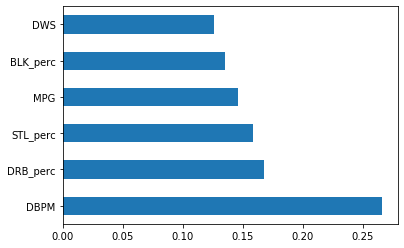

In [15]:
binned_data = pd.cut(df.Defensive_Rating, 5, labels=["Elite","Above Average","Average","Below Average","Poor"])

X = df[["MPG","DRB_perc","STL_perc","BLK_perc","DWS","DBPM"]]
y = binned_data

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The target variable in this case is defensive rating. The variable with the highest score and most relevance towards defensive rating is defensive box plus/minus. This is intuitive because these variables are very closely related. Defensive rating attempts to measure an individuals defense and the points scored against the team based on that individual's defensive lapses. Defensive box plus/minus measures the points scored against the team with the individual player on the court per 100 possessions. In total, both of these metrics measure the points scored against the team with the individual player on the court.

This is a relatively easy way to determine how effective an individual is at playing defense. If an individual has a low defensive rating and a low defensive box plus/minus it would signify that they do not have many individual defensive laspes and that they are able to help their teammates stop opposing teams from scoring.

[0.278619   0.13585322 0.131034   0.13630656 0.16311585 0.15507137]


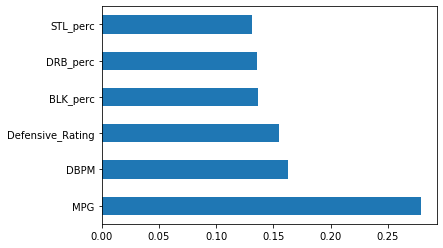

In [16]:
binned_data2 = pd.cut(df.DWS, 5, labels=["Elite","Above Average","Average","Below Average","Poor"])

X = df[["MPG","DRB_perc","STL_perc","BLK_perc","DBPM","Defensive_Rating"]]
y = binned_data2

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The target variable in this case in defensive win shares. The variable with the highest score and most relevance to defensive win shares is minutes per game. This makes sense because for a player to have more of an impact on the outcome of a game the player must be on the floor.

Defensive win shares has some merit in terms of effectively measuring defense. It attempts to calculate the marginal defensive value. Another way to think about it is how much better a team's defense is contributing to wins while the player is on the court. The more a defender is able to impact the game with blocks, steals, rebounds, contesting shots, etc., the better the team's defense will be and the more games they will win.

## Literature Review of Defensive Metrics

As far as basketball analytics have come in trying to quanitify how effective an individual plays defense, there is still a long ways to go. The biggest limitation in quantifying how good someone is at defense is that it is hard to break down basketball plays into discrete events. For example, how can one measure how well a player fought through a screen to contest a three pointer? There is simply much more to playing great defense than just blocks, steals, and rebounds. This is where the measurements like defensive rating, defensive box plus/minus, defensive win shares, block percentage, steal percentage, and defensive rebound percentage struggle to explain why someone is a great defender. Also, these statistics are very much tied into how good your teammates are at defense as well, which complicates the matters even more. For example, in my clustering model you see multiple players from the same team in part because they have a really good defense overall. However, these statistics are effective at measuring the impact an individual player makes on his team.

This is where player tracking data has helped try to explain why someone is an effective defender. With player tracking data, measurements like rim protecting data and how effective a defender is at contesting shots have helped put the pieces of determining productive individual defense together. However, there are some limitations with player tracking data. The game of basketball is still too complex for data to tell us how effective someone is at playing defense. For example, is the player who is physically closest to the shooter always responsible for them making or missing the shot? Or if a player gets beat off the dribble and there is no rotation to help whose fault is it? How could it be quantified that both had defensive laspes?

Depending on how you want to view a defender and how effective they are at playing defense is based on which statistics and information you have avaiable to you. If you want to see how much they impact their overall team's defense then metrics like defensive box plus/minus and defensive rating will tell you the impact they have. If you want to determine why someone is a effective defender then using player tracking measurements will enable you to see what makes them a great defender. Both types of measurements should be taken cautiously because there is not a specific metric to determine how well someone plays defense. However, using these together can give a general manager a good idea of what type of defender they are.

Sources:
- http://www.basketballinsiders.com/nba-am-measuring-individual-defense/
- https://fansided.com/2018/10/02/nylon-questions-individual-defensive-impact/
- https://www.vice.com/en_us/article/aebkbz/why-an-all-in-one-defensive-stat-is-still-the-nbas-holy-grail
